In [1]:
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from pprint import pprint

Using TensorFlow backend.


In [2]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = train[:, 1:]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_img, train_label, test_size=0.2, random_state=42)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
y_train = np_utils.to_categorical(y_train, 10)

In [7]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [8]:
model = Sequential()

In [9]:
model.add(Dense(1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation="softmax"))

In [10]:
model.compile(loss="categorical_crossentropy",optimizer="SGD",metrics=["accuracy"])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train,y_train, batch_size=200,epochs=100,verbose=1)

Epoch 1/100
33600/33600 [==============================] - 3s - loss: 0.3843 - acc: 0.8992     - ETA: 1s - loss: 0.3
Epoch 2/100
33600/33600 [==============================] - 4s - loss: 0.3663 - acc: 0.9027     
Epoch 3/100
33600/33600 [==============================] - 3s - loss: 0.3517 - acc: 0.9052     
Epoch 4/100
33600/33600 [==============================] - 3s - loss: 0.3392 - acc: 0.9082     
Epoch 5/100
33600/33600 [==============================] - 3s - loss: 0.3286 - acc: 0.9110     
Epoch 6/100
33600/33600 [==============================] - 3s - loss: 0.3192 - acc: 0.9129     
Epoch 7/100
33600/33600 [==============================] - 3s - loss: 0.3108 - acc: 0.9154     
Epoch 8/100
33600/33600 [==============================] - 3s - loss: 0.3035 - acc: 0.9167     
Epoch 9/100
33600/33600 [==============================] - 3s - loss: 0.2967 - acc: 0.9192     
Epoch 10/100
33600/33600 [==============================] - 3s - loss: 0.2904 - acc: 0.9210     
Epoch 11/100
33600

33600/33600 [==============================] - 3s - loss: 0.1357 - acc: 0.9635     - ETA: 3s - loss: 0.1315 - acc
Epoch 85/100
33600/33600 [==============================] - 3s - loss: 0.1347 - acc: 0.9645     
Epoch 86/100
33600/33600 [==============================] - 3s - loss: 0.1338 - acc: 0.9643     
Epoch 87/100
33600/33600 [==============================] - 4s - loss: 0.1328 - acc: 0.9645     
Epoch 88/100
33600/33600 [==============================] - 3s - loss: 0.1320 - acc: 0.9651     
Epoch 89/100
33600/33600 [==============================] - 4s - loss: 0.1311 - acc: 0.9649     
Epoch 90/100
33600/33600 [==============================] - 4s - loss: 0.1302 - acc: 0.9655     
Epoch 91/100
33600/33600 [==============================] - 4s - loss: 0.1292 - acc: 0.9655     
Epoch 92/100
33600/33600 [==============================] - 4s - loss: 0.1284 - acc: 0.9659     
Epoch 93/100
33600/33600 [==============================] - 4s - loss: 0.1275 - acc: 0.9665     
Epoch 94/100


In [14]:
predictions = model.predict_classes(X_test)

8256/8400 [============================>.] - ETA: 0s

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_test,predictions)

0.9553571428571429

In [17]:
Y = np_utils.to_categorical(train_label)

In [18]:
train_img = train_img.astype('float32')
train_img /= 255

In [19]:
Y[0]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [20]:
model = Sequential()

In [21]:
model.add(Dense(1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(1000, kernel_initializer='normal',activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation="softmax"))

In [22]:
model.compile(loss="categorical_crossentropy",optimizer="SGD",metrics=["accuracy"])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(train_img,Y, batch_size=25,epochs=25,verbose=1)

Epoch 1/25
42000/42000 [==============================] - 30s - loss: 0.4354 - acc: 0.8824    
Epoch 2/25
42000/42000 [==============================] - 29s - loss: 0.2256 - acc: 0.9361    
Epoch 3/25
42000/42000 [==============================] - 29s - loss: 0.1771 - acc: 0.9499    
Epoch 4/25
42000/42000 [==============================] - 30s - loss: 0.1462 - acc: 0.9596    
Epoch 5/25
42000/42000 [==============================] - 30s - loss: 0.1238 - acc: 0.9665    
Epoch 6/25
42000/42000 [==============================] - 30s - loss: 0.1070 - acc: 0.9712    
Epoch 7/25
42000/42000 [==============================] - 30s - loss: 0.0940 - acc: 0.9749    
Epoch 8/25
42000/42000 [==============================] - 30s - loss: 0.0832 - acc: 0.9778    
Epoch 9/25
42000/42000 [==============================] - 30s - loss: 0.0736 - acc: 0.9811    - ETA: 0s - loss: 0.0738 - acc:
Epoch 10/25
42000/42000 [==============================] - 29s - loss: 0.0662 - acc: 0.9831    
Epoch 11/25
42000/

In [25]:
test = test.astype('float32')
test /= 255

In [26]:
predictions = model.predict_classes(test)

27680/28000 [============================>.] - ETA: 0s

In [27]:
!rm submit.txt

In [28]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(predictions, 1):
        dst.write('%s,%s\n' % (i, p))

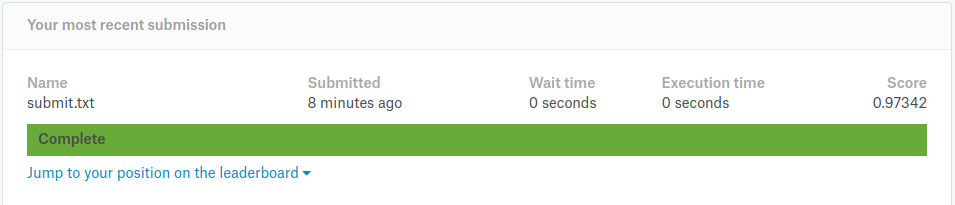

In [30]:
from IPython.display import Image
Image(filename='Screenshot.png')